In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import imghdr

In [2]:
data_dir=os.listdir('data')

In [3]:
data_dir

['Mask', 'No Mask']

In [4]:
image_exts=['jpeg','png','jpg']

In [7]:
for directory in data_dir:
    for image in os.listdir(os.path.join('data', directory)):
        image_path=os.path.join('data',directory,image)
        img=cv.imread(image_path)
        faulty=imghdr.what(image_path)
        if faulty not in image_exts:
            os.remove(image_path)


print('Completed!!!')

Completed!!!


<h1>Load Dataset</h1>

In [4]:
import numpy as np

In [6]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 188 files belonging to 2 classes.


In [7]:
data_iterator=data.as_numpy_iterator()

In [8]:
batch=data_iterator.next()

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
# class 1 = without mask
# Class 0 = with mask
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

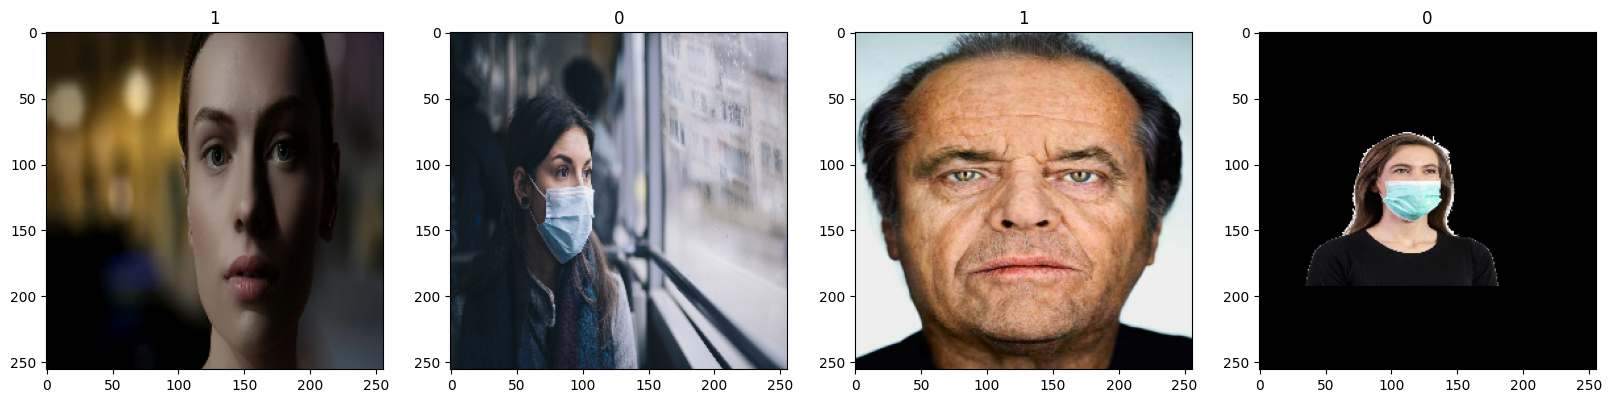

In [11]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(batch[0][:4]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>Processing Data</h1>

In [12]:
data=data.map(lambda x,y: (x/255,y))

In [13]:
scaled_iterator=data.as_numpy_iterator()

In [14]:
batch=scaled_iterator.next()

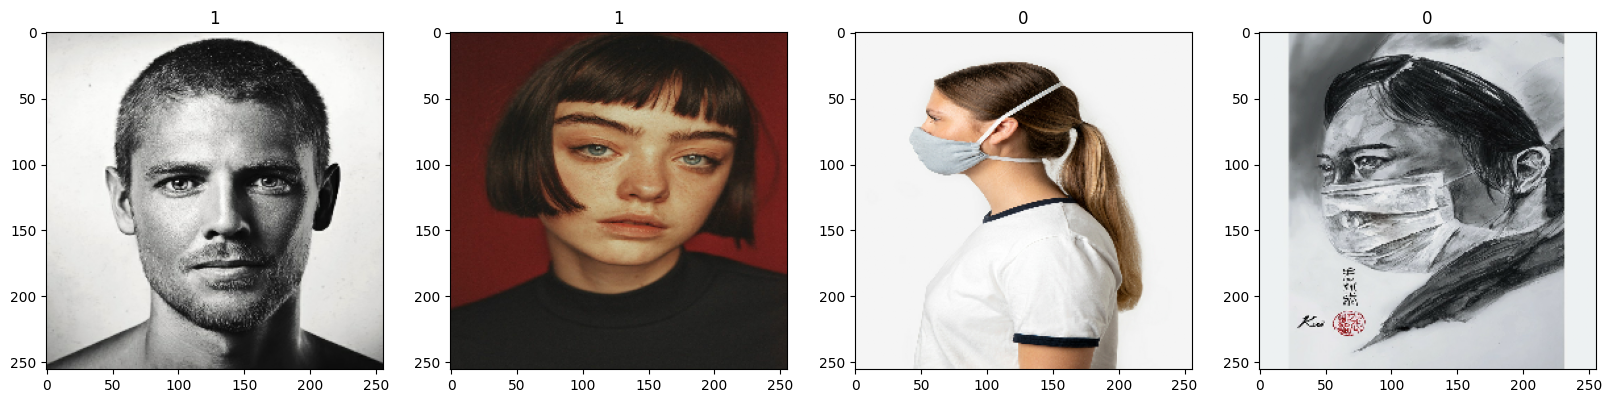

In [15]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(batch[0][:4]):
    ax[idx].imshow(image)
    ax[idx].title.set_text(batch[1][idx])

<h1>Spliting the Data</h1>

In [16]:
len(data)

6

In [17]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

In [18]:
print(train_size+test_size+val_size)

6


In [19]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

<h1>Building DeepLearning Model</h1>
<h3>1. Creating the model</h3>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

#layer 1
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

#layer-2
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

#layer-3
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 23s 4s/step - loss: 0.7268 - accuracy: 0.5625 - val_loss: 0.6078 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.5947 - accuracy: 0.6641 - val_loss: 0.4481 - val_accuracy: 0.7812
Epoch 3/20
4/4 [==============================] - 7s 1s/step - loss: 0.4943 - accuracy: 0.7188 - val_loss: 0.4708 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.4044 - accuracy: 0.7969 - val_loss: 0.2974 - val_accuracy: 0.9062
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.3382 - accuracy: 0.8438 - val_loss: 0.2568 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.2252 - accuracy: 0.9375 - val_loss: 0.1597 - val_accuracy: 0.9688
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.1782 - accuracy: 0.9219 - val_loss: 0.1068 - val_accuracy: 0.9375
Epoch 8/20
4/4 [========================

In [28]:
hist.history

{'loss': [0.7268013954162598,
  0.5946907997131348,
  0.4942663013935089,
  0.4043770730495453,
  0.3382173180580139,
  0.2251787930727005,
  0.17815160751342773,
  0.18155691027641296,
  0.10331206023693085,
  0.10378279536962509,
  0.08709709346294403,
  0.12896740436553955,
  0.061601169407367706,
  0.034891195595264435,
  0.03824900463223457,
  0.032211534678936005,
  0.016345128417015076,
  0.019922293722629547,
  0.0053674099035561085,
  0.010683002881705761],
 'accuracy': [0.5625,
  0.6640625,
  0.71875,
  0.796875,
  0.84375,
  0.9375,
  0.921875,
  0.9453125,
  0.96875,
  0.9765625,
  0.984375,
  0.9375,
  0.984375,
  1.0,
  0.9921875,
  0.9921875,
  1.0,
  0.984375,
  1.0,
  1.0],
 'val_loss': [0.6078043580055237,
  0.44809895753860474,
  0.47081616520881653,
  0.29743748903274536,
  0.2567991614341736,
  0.15969952940940857,
  0.10682603716850281,
  0.17795640230178833,
  0.06710801273584366,
  0.14683201909065247,
  0.08259931206703186,
  0.04130709916353226,
  0.0419196113

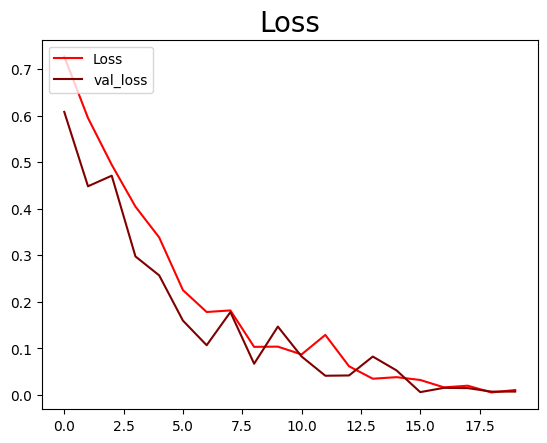

In [84]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='red',label='Loss')
plt.plot(hist.history['val_loss'],color='maroon',label='val_loss')
plt.title('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

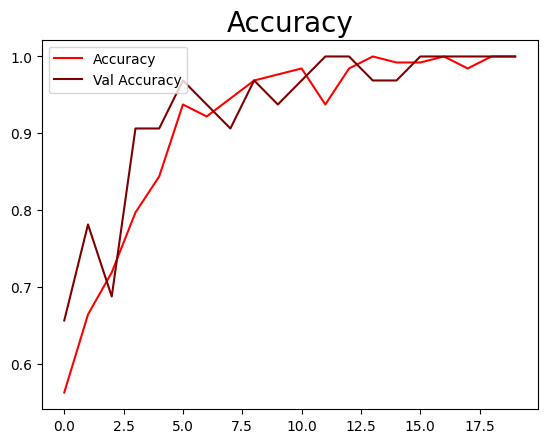

In [40]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='maroon',label='Val Accuracy')
plt.title('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

<h1>Evaluate performance</h1>

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
precision=Precision()
accuracy=BinaryAccuracy()
recall=Recall()

In [50]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    precision.update_state(y,yhat)
    accuracy.update_state(y,yhat)
    recall.update_state(y,yhat)

1/1 [==============================] - 0s 140ms/step


In [54]:
print(f'Precision: {precision.result()}, Accuracy: {accuracy.result()}, Recall: {recall.result()}')

Precision: 1.0, Accuracy: 1.0, Recall: 1.0


<h3>Testing on new data</h3>

In [3]:
img=cv.imread('masktest.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img=cv.resize(img,(256,256))
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

In [72]:
img=np.expand_dims(img/255,0)

In [73]:
yhat=model.predict(img)

1/1 [==============================] - 0s 357ms/step


In [74]:
print(yhat)

[[2.7286389e-05]]


In [75]:
if yhat>0.5:
    print('Without mask')

else:
    print('With mask')

With mask


<h1>Saving Model</h1>

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save(os.path.join('models','maskdetectionmodel.h5'))

In [80]:
new_model=load_model(os.path.join('models','maskdetectionmodel.h5'))

In [81]:
y_hat=new_model.predict(img)

1/1 [==============================] - 1s 557ms/step


In [83]:
if y_hat<0.5:
    print('With mask')
else:
    print('without mask')

With mask
